In [1]:
from pymongo import MongoClient
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from wsba import *
%matplotlib inline
from datetime import timedelta
import random
import numpy as np
import names as randomname # for redditor anonymization
#
# ML Imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold

# graphs
plt.style.use('ggplot')
# Pilfered from https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd
sns.set(
    #font='Franklin Gothic Book',
    rc={
         'axes.axisbelow': False,
         'axes.edgecolor': 'lightgrey',
         'axes.facecolor': 'None',
         'axes.grid': False,
         'axes.labelcolor': 'dimgrey',
         'axes.spines.right': False,
         'axes.spines.top': False,
         'figure.facecolor': 'white',
         'lines.solid_capstyle': 'round',
         'patch.edgecolor': 'w',
         'patch.force_edgecolor': True,
         'text.color': 'dimgrey',
         'xtick.bottom': True,
         'xtick.color': 'dimgrey',
         'xtick.direction': 'out',
         'xtick.top': False,
         'ytick.color': 'dimgrey',
         'ytick.direction': 'out',
         'ytick.left': True,
         'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})


In [56]:
df = fields_to_df(fielda_max=2_000,minimum_val=1)
df.head()

,num_comments,score,upvote_ratio
0,4,11,0.76
1,2,32,0.95
2,13,22,0.76
3,2,9,0.72
4,59,96,0.88


In [57]:
X = np.log2(df[['num_comments']])
y = np.log2(df['score'])

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)

(2907, 1)
(2907,)


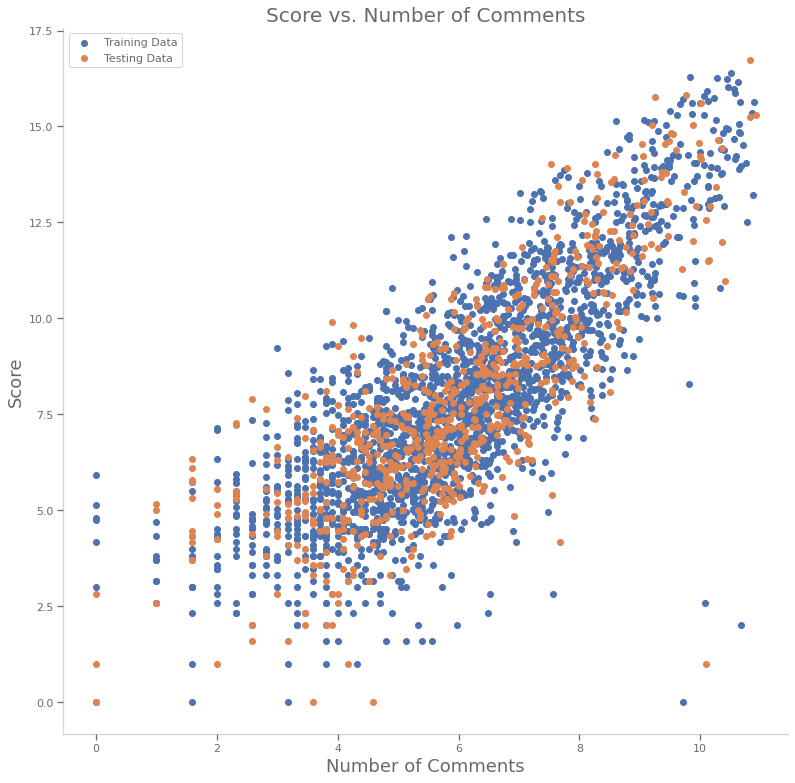

In [16]:
fig, ax = plt.subplots(figsize=(13,13))
ax.scatter(X_train,y_train, label='Training Data')
ax.scatter(X_test,y_test, label='Testing Data')
ax.set_title('Score vs. Number of Comments')
ax.set_xlabel("Number of Comments")
ax.set_ylabel("Score")
ax.legend()

In [58]:
model = KNeighborsRegressor(20)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [59]:
def MSE(y_hat, y_test):
    '''
    y_hat: predicted y values from x_test 
    y_test: actual y values from x_test
    '''
    return np.mean((y_hat - y_test)**2)

In [60]:
print("R^2 on training data: {}".format(model.score(X_train, y_train)))
print("R^2 on testing data:  {}".format(model.score(X_test, y_test)))
    
y_hat_train = model.predict(X_train)
y_hat = model.predict(X_test)

# Let's also take a look at our MSE for the sake of it
print(MSE(y_hat, y_test))
print(MSE(y_hat_train, y_train))

R^2 on training data: 0.6853136045809542
R^2 on testing data:  0.6841821334473313
2.861685867678044
2.513297582768958


In [61]:
#resplit your data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

#again, train on just the "training" set
model = KNeighborsRegressor(20)
model.fit(X_train, y_train)
print("R^2 on training data: {}".format(model.score(X_train, y_train)))
print("R^2 on testing data:  {}".format(model.score(X_test, y_test)))


y_hat = model.predict(X_test)
# Let's also take a look at our MSE for the sake of it
MSE(y_hat, y_test)

R^2 on training data: 0.6856650881499622
R^2 on testing data:  0.6856948308332338


2.573484600788449

R^2 on training data: 0.6832128001236706
R^2 on testing data:  0.6679347371525606


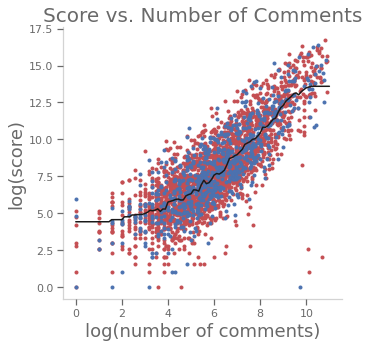

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("log(number of comments)")
ax.set_ylabel("log(score)")
ax.set_title('Score vs. Number of Comments')
ax.plot(X_train, y_train, 'r.')
ax.plot(X_test, y_test, 'b.')



model = KNeighborsRegressor(20)
model.fit(X_train, y_train)
xpts = np.linspace(0, 11, 100).reshape(-1, 1)
ax.plot(xpts, model.predict(xpts), 'k-')

print("R^2 on training data: {}".format(model.score(X_train, y_train)))
print("R^2 on testing data:  {}".format(model.score(X_test, y_test)))

In [28]:
#another MSE function that can take a model as a parameter
def mean_squared_error(model, X, y):
    return np.mean((model.predict(X) - y) **2)

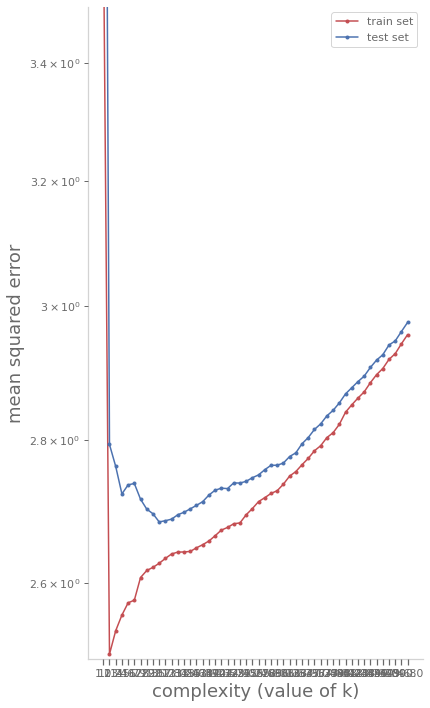

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

train_score = []
test_score = []
maxk = 500
xrange = np.linspace(1, maxk, 50)
for k_float in xrange:
    k = int(k_float)
    model = KNeighborsRegressor(k)
    model.fit(X_train, y_train)
    train_score.append(mean_squared_error(model, X_train, y_train))
    test_score.append(mean_squared_error(model, X_test, y_test))
    #train_score.append(-model.score(X_train, y_train))
    #test_score.append(-model.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(6,12))
ax.plot(xrange, train_score, '.-r', label="train set")
ax.plot(xrange, test_score, '.-b', label="test set")
ax.set_xlabel('complexity (value of k)')
ax.set_ylabel('mean squared error')
ax.set_ylim(2.5,3.5)
plt.yscale('log')
ax.legend()
ax.set_xticks(xrange)
plt.show()
#print(xrange)

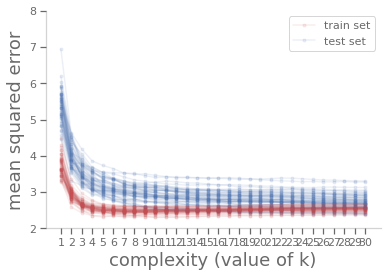

In [39]:
fig, ax = plt.subplots()
kmax = 31
for t in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    train_score = []
    test_score = []

    for k in range(1, kmax):
        model = KNeighborsRegressor(k)
        model.fit(X_train, y_train)
        train_score.append(mean_squared_error(model, X_train, y_train))
        test_score.append(mean_squared_error(model, X_test, y_test))
        #train_score.append(-model.score(X_train, y_train))
        #test_score.append(-model.score(X_test, y_test))
    if t == 0:
        ax.plot(range(1, kmax), train_score, 'r.-', label="train set", alpha=0.1)
        ax.plot(range(1, kmax), test_score, 'b.-', label="test set", alpha=0.1)
    else:
        ax.plot(range(1, kmax), train_score, 'r.-', alpha=0.1)
        ax.plot(range(1, kmax), test_score, 'b.-', alpha=0.1)
        
ax.set_xlabel('complexity (value of k)')
ax.set_ylabel('mean squared error')
ax.set_ylim(2, 8)
ax.legend()
ax.set_xticks(range(1, kmax))
plt.show()

In [40]:
np.random.seed(42)
#use the sklearn KFold
kf = KFold(n_splits=5, shuffle=True)  # almost always use shuffle=True
#Create a score accumulator
fold_scores = []

#Iterate through the 5 splits
for train_indices, test_indices in kf.split(X_train):
    model = KNeighborsRegressor(10)
    model.fit(X_train.values[train_indices], y_train.values[train_indices])
    fold_scores.append(model.score(X_train.values[test_indices], y_train.values[test_indices]))

print(f"R^2 score against each test set: {[round(score, 2) for score in fold_scores]}")
print(np.mean(fold_scores))

R^2 score against each test set: [0.59, 0.67, 0.64, 0.64, 0.67]
0.6394657630709393


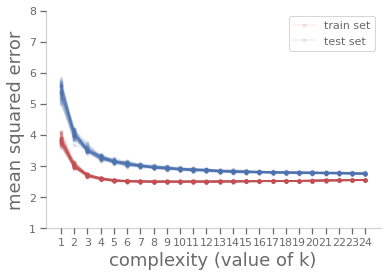

In [41]:
fig, ax = plt.subplots()
kmax= 25
for t in range(50):
    #Do KFold 50 times to look at more accurate errors scores when comparing differen n_neighbors(k)
    kf = KFold(n_splits=5, shuffle=True)
    scores = []

    train_score = []
    test_score = []

    for k in range(1, kmax):
        train_fold_scores = []
        test_fold_scores = []

        for train_indices, test_indices in kf.split(X):
            model = KNeighborsRegressor(k)
            model.fit(X.values[train_indices], y.values[train_indices])
            train_fold_scores.append(mean_squared_error(model, X.values[train_indices], y.values[train_indices]))
            test_fold_scores.append(mean_squared_error(model, X.values[test_indices], y.values[test_indices]))

        train_score.append(np.mean(train_fold_scores))
        test_score.append(np.mean(test_fold_scores))
        #train_score.append(-model.score(X_train, y_train))
        #test_score.append(-model.score(X_test, y_test))
    if t == 0:
        ax.plot(range(1, kmax), train_score, 'r.-', label="train set", alpha=0.1)
        ax.plot(range(1, kmax), test_score, 'b.-', label="test set", alpha=0.1)
    else:
        ax.plot(range(1, kmax), train_score, 'r.-', alpha=0.1)
        ax.plot(range(1, kmax), test_score, 'b.-', alpha=0.1)
        
ax.set_xlabel('complexity (value of k)')
ax.set_ylabel('mean squared error')
ax.set_ylim(1, 8)
ax.legend()
ax.set_xticks(range(1, kmax))
plt.show()

In [47]:
np.random.seed(42)
from sklearn.model_selection import cross_validate
## Let's build a model, cross-validate it and get the test score

#data = cars.copy()

#Using all but one of our features for now... 
y = df.pop('score')

X = df.iloc[:, :-1]





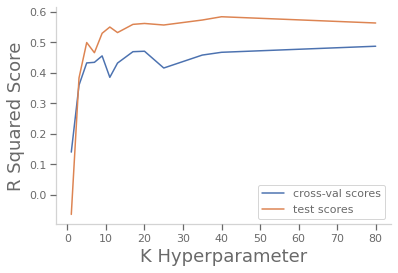

In [52]:
#Here X_test/y_test is our holdout set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

# Cross validate against X_train and y_train... this will create 
k_vals = [1, 3, 5, 7, 9, 11, 13, 17, 20, 25, 35, 40, 80]


cv_scores = []
test_scores = []
## building several models with different values of k
for k in k_vals:
    model = KNeighborsRegressor(k)
    #Note in cross_validate, it has specifically KFolds cross validation as an option, there are other ways to CV but this is most popular
    cv = cross_validate(model, X_train, y_train, cv = KFold(n_splits = 5, shuffle=True))['test_score'].mean()

    # store the average score in accumulators to compare later
    cv_scores.append(cv)
    # lets see how we compare against the holdout data
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)
    
fig, ax = plt.subplots()
ax.plot(k_vals, cv_scores, label = 'cross-val scores')
ax.plot(k_vals, test_scores, label = 'test scores')
ax.set_xlabel('K Hyperparameter')
ax.set_ylabel('R Squared Score')
ax.legend();